# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 74404.64 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101191.48 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 120922.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 132138.81 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139616.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147127.50 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72663.60 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 106412.82 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 126354.94 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 137954.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142122.81 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147981.14 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.41 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.82 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.83 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.55 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.63 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.24 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.13 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.12 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.78 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.78 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.63 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.81 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.14 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 45.82 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.25 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.31 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.29 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.71 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.73 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.81 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 47.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.02 examples/s]

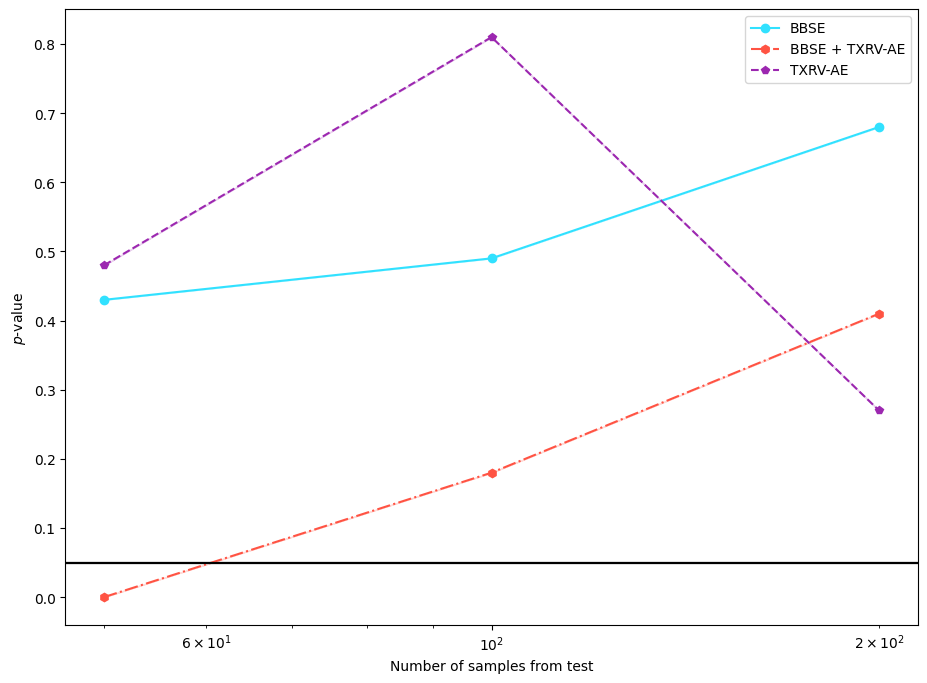

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.13 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.85 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.61 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 57.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.72 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.39 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.84 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.14 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.25 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.48 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.03 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.09 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.66 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.86 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.42 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.91 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.62 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.90 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.49 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.22 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.15 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.71 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.06 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.24 examples/s]

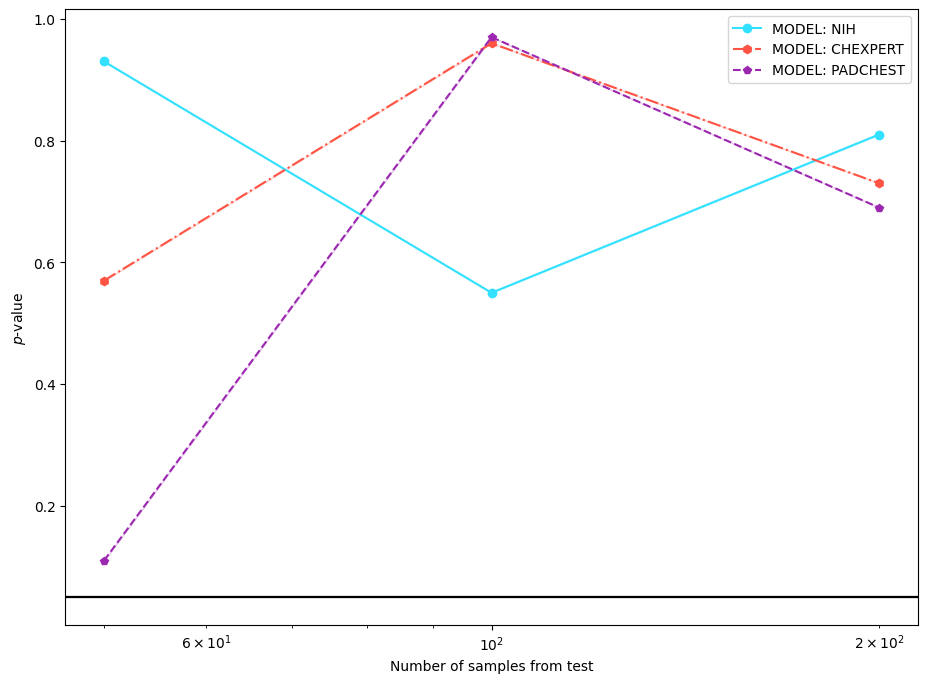

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52860.21 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74523.33 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85514.15 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94291.99 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97361.92 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 103432.21 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58493.90 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 85555.25 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 100072.30 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 109566.76 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 116173.22 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 122537.07 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.36 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.67 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.87 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.16 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.62 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.23 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55863.67 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78053.89 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91216.98 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103121.09 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 116150.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 133168.41 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54205.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73808.73 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92915.09 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103657.56 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110329.67 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 116575.26 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.57 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.24 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.87 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.40 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.08 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.20 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.57 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.41 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.25 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.65 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58269.16 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 85186.06 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 100702.98 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 110287.13 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114677.73 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 118904.57 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50364.28 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75188.50 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86420.92 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98438.81 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 107474.14 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 114300.37 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.99 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.70 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.56 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.26 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.30 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.24 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.04 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.58 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58985.52 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 85409.18 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95121.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 109602.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114949.07 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 119046.28 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56925.75 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 83913.07 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 99787.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 109386.34 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 115596.68 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 120537.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.26 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.49 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.20 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.04 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.43 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.23 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.85 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.21 examples/s]

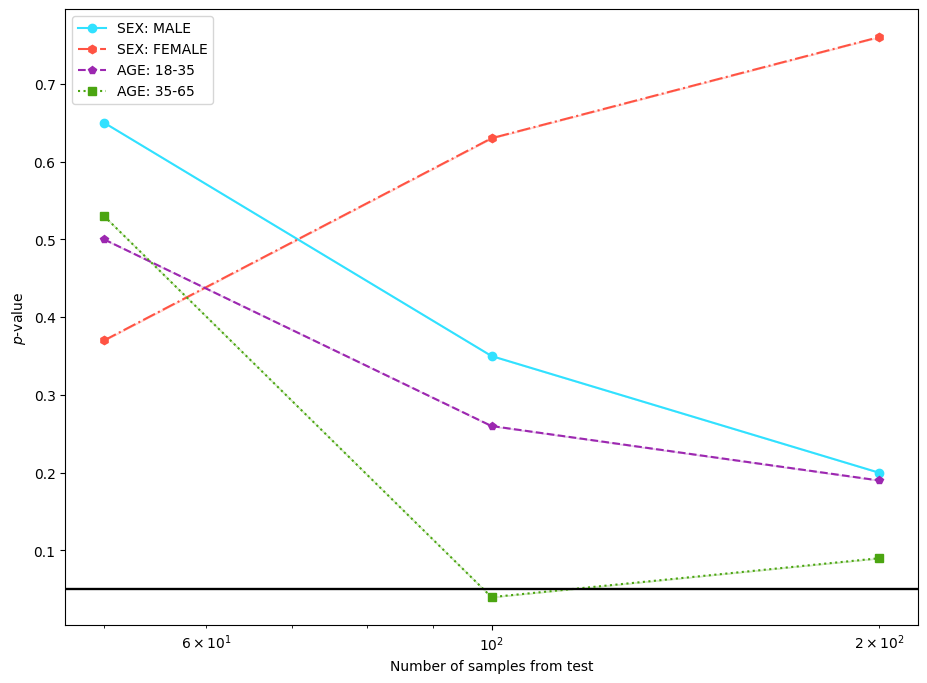

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.37 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.24 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.25 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.31 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.16 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.79 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.07 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.05 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.94 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.88 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.03 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.42 examples/s]

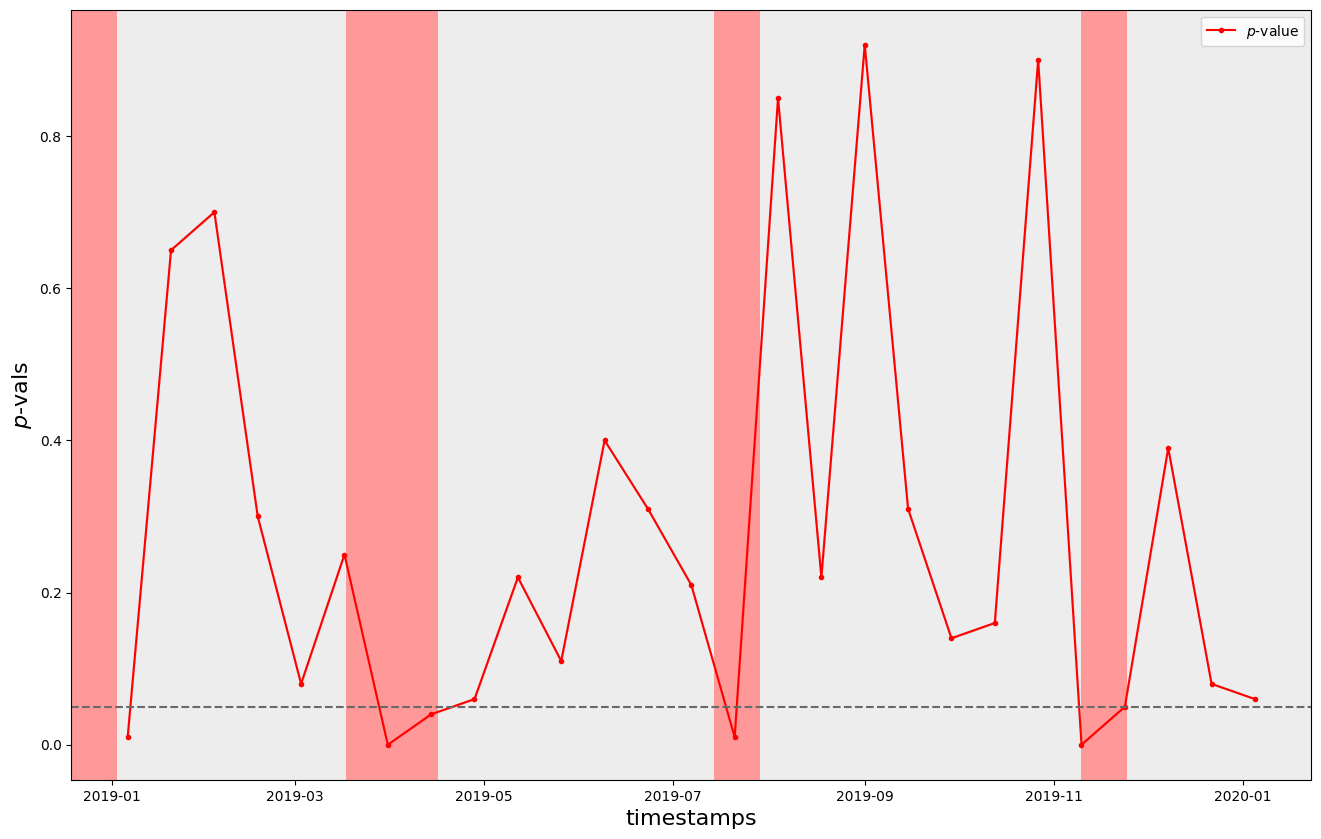

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)